# Benchmark Comparison Tool

This notebook analyzes and compares benchmark results across:
- **Heat Consumption** (Nordbyen DMA)
- **Water Consumption** (Centrum DMA)

**Models evaluated:**
- NHITS with Quantile Loss (NHITS_Q)
- NHITS with MSE Loss (NHITS_MSE)  
- TIMESNET with Quantile Loss (TIMESNET_Q)
- TIMESNET with MSE Loss (TIMESNET_MSE)

**Metrics:**
- MAE, RMSE, MAPE (point forecasts)
- PICP, MIW, CRPS (probabilistic forecasts)

## 1. Setup and Data Loading

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display

# Set visualization style
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")
print(f"Working directory: {os.getcwd()}")

✓ Libraries imported successfully
Working directory: /home/hpc/iwi5/iwi5389h/ExAI-Timeseries-Thesis


In [14]:
# Load benchmark history
history_file = "results/benchmark_history.csv"

if not os.path.exists(history_file):
    print(f"❌ History file not found: {history_file}")
else:
    df = pd.read_csv(history_file)
    
    print("="*80)
    print("BENCHMARK HISTORY LOADED")
    print("="*80)
    print(f"Total entries: {len(df)}")
    print(f"Date range: {df['run_date'].min()} → {df['run_date'].max()}")
    print(f"\nDatasets: {df['dataset'].unique()}")
    print(f"Models: {df['Model'].unique()}")
    print(f"\nColumns: {list(df.columns)}")
    print("="*80)
    
    # Show summary by dataset
    print("\n📊 ENTRIES BY DATASET:")
    for dataset in df['dataset'].unique():
        count = len(df[df['dataset'] == dataset])
        models = df[df['dataset'] == dataset]['Model'].nunique()
        print(f"  {dataset}: {count} entries, {models} unique models")
    
    print("\n✓ Data loaded successfully")

BENCHMARK HISTORY LOADED
Total entries: 14
Date range: 2025-12-22 01:56:06 → 2025-12-26 20:17:23

Datasets: ['Heat (Nordbyen)' 'Water (Centrum)']
Models: ['NHITS_Q' 'NHITS_MSE' 'TIMESNET_Q' 'TIMESNET_MSE']

Columns: ['MAE', 'RMSE', 'MAPE', 'PICP', 'MIW', 'CRPS', 'Model', 'dataset', 'timestamp', 'run_date', 'n_epochs', 'has_hpo']

📊 ENTRIES BY DATASET:
  Heat (Nordbyen): 10 entries, 4 unique models
  Water (Centrum): 4 entries, 4 unique models

✓ Data loaded successfully


## 2. Overall Performance Comparison

In [28]:
# Get the latest (best) result for each model-dataset combination
latest_results = df.sort_values('run_date').groupby(['dataset', 'Model']).tail(1)

print("="*80)
print("LATEST RESULTS BY MODEL AND DATASET")
print("="*80)

# Display key metrics
display_cols = ['dataset', 'Model', 'MAE', 'RMSE', 'MAPE', 'PICP', 'MIW', 'CRPS', 'run_date', 'n_epochs', 'has_hpo']
available_cols = [col for col in display_cols if col in latest_results.columns]
display(latest_results[available_cols].sort_values(['dataset', 'Model']).reset_index(drop=True))

print("\n" + "="*80)

LATEST RESULTS BY MODEL AND DATASET


,dataset,Model,MAE,RMSE,MAPE,PICP,MIW,CRPS,run_date,n_epochs,has_hpo
0,Heat (Nordbyen),NHITS_MSE,0.252636,0.325075,7.523875,NaN,NaN,NaN,2025-12-26 13:45:11,100,False
1,Heat (Nordbyen),NHITS_Q,0.194334,0.253312,5.892420,40.416667,0.247687,0.206565,2025-12-26 13:45:11,100,True
2,Heat (Nordbyen),TIMESNET_MSE,0.500837,1.541636,14.873785,NaN,NaN,NaN,2025-12-26 20:05:44,150,False
3,Heat (Nordbyen),TIMESNET_Q,0.216898,0.281472,6.607864,20.083333,0.148148,0.188911,2025-12-26 20:05:44,150,True
4,Water (Centrum),NHITS_MSE,0.005683,0.007761,44.802333,NaN,NaN,NaN,2025-12-26 20:17:23,100,False
5,Water (Centrum),NHITS_Q,0.005339,0.007678,32.917680,40.666667,0.008200,0.005866,2025-12-26 20:17:23,100,True
6,Water (Centrum),TIMESNET_MSE,0.003344,0.004651,19.645948,NaN,NaN,NaN,2025-12-26 18:32:45,150,False
7,Water (Centrum),TIMESNET_Q,0.002944,0.004035,16.853004,53.166667,0.005634,0.002251,2025-12-26 18:32:45,150,True


In [30]:
# Get the latest (best) result for each model-dataset combination
latest_results = df.sort_values('run_date').groupby(['dataset', 'Model']).tail(1)

print("="*80)
print("LATEST RESULTS BY MODEL AND DATASET")
print("="*80)

# Display key metrics
display_cols = ['dataset', 'Model', 'PICP', 'MIW', 'CRPS']
available_cols = [col for col in display_cols if col in latest_results.columns]
display(latest_results[available_cols].sort_values(['dataset', 'Model']).reset_index(drop=True))

print("\n" + "="*80)

LATEST RESULTS BY MODEL AND DATASET


,dataset,Model,PICP,MIW,CRPS
0,Heat (Nordbyen),NHITS_MSE,NaN,NaN,NaN
1,Heat (Nordbyen),NHITS_Q,40.416667,0.247687,0.206565
2,Heat (Nordbyen),TIMESNET_MSE,NaN,NaN,NaN
3,Heat (Nordbyen),TIMESNET_Q,20.083333,0.148148,0.188911
4,Water (Centrum),NHITS_MSE,NaN,NaN,NaN
5,Water (Centrum),NHITS_Q,40.666667,0.008200,0.005866
6,Water (Centrum),TIMESNET_MSE,NaN,NaN,NaN
7,Water (Centrum),TIMESNET_Q,53.166667,0.005634,0.002251


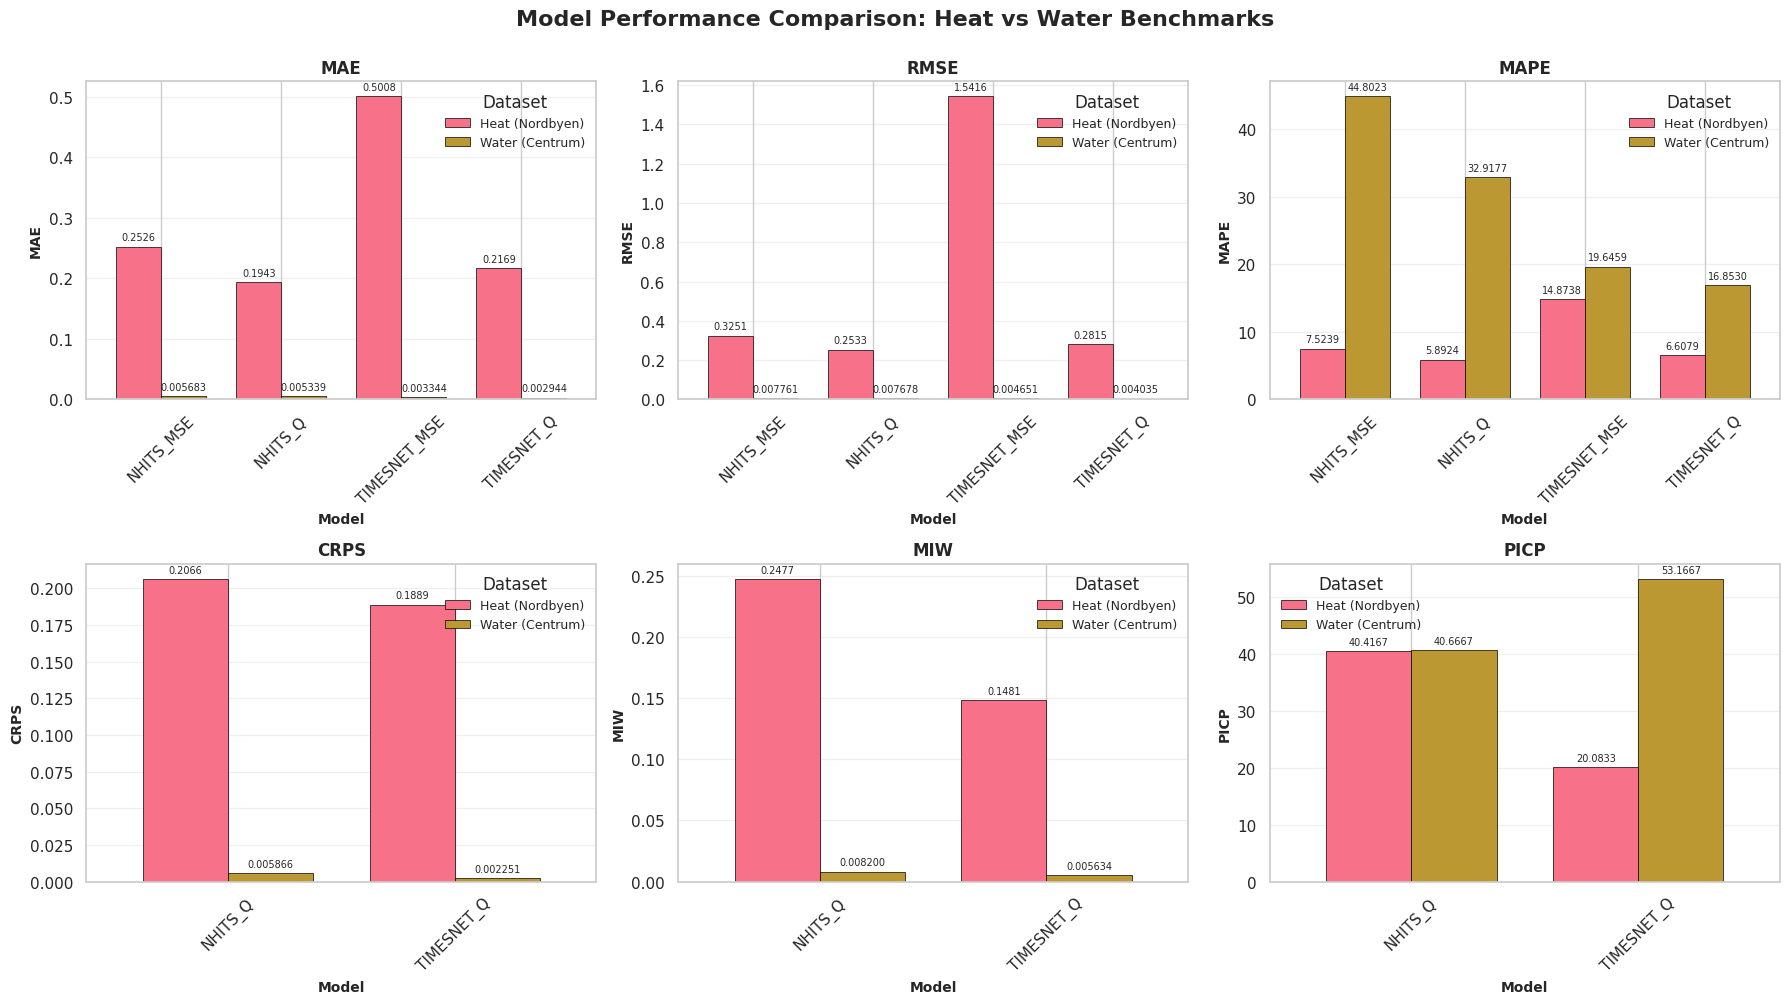

✓ Saved to: results/benchmark_comparison_all.png


In [16]:
# Create comprehensive comparison plots
metrics = ['MAE', 'RMSE', 'MAPE', 'CRPS', 'MIW', 'PICP']
available_metrics = [m for m in metrics if m in latest_results.columns and latest_results[m].notna().any()]

n_metrics = len(available_metrics)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison: Heat vs Water Benchmarks', 
             fontsize=16, fontweight='bold', y=1.00)

for idx, metric in enumerate(available_metrics):
    ax = axes[idx // 3, idx % 3]
    
    # Prepare data for grouped bar plot
    pivot_data = latest_results.pivot_table(
        values=metric, 
        index='Model', 
        columns='dataset',
        aggfunc='first'
    )
    
    # Plot
    pivot_data.plot(kind='bar', ax=ax, width=0.75, edgecolor='black', linewidth=0.5)
    ax.set_title(f'{metric}', fontweight='bold', fontsize=12)
    ax.set_xlabel('Model', fontweight='bold', fontsize=10)
    ax.set_ylabel(metric, fontweight='bold', fontsize=10)
    ax.legend(title='Dataset', loc='best', fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for container in ax.containers:
        labels = [f'{v:.4f}' if v > 0.01 else f'{v:.6f}' for v in container.datavalues]
        ax.bar_label(container, labels=labels, fontsize=7, padding=3)

plt.tight_layout()
plot_file = 'results/benchmark_comparison_all.png'
plt.savefig(plot_file, dpi=150, bbox_inches='tight')
plt.show()
print(f"✓ Saved to: {plot_file}")

## 3. Best Performers Analysis

In [18]:
print("="*80)
print("🏆 BEST PERFORMERS BY METRIC")
print("="*80)

# Point forecast metrics (lower is better)
for metric in ['MAE', 'RMSE', 'MAPE', 'CRPS']:
    if metric in latest_results.columns and latest_results[metric].notna().any():
        print(f"\n{metric} (Lower is Better):")
        best_overall = latest_results.loc[latest_results[metric].idxmin()]
        print(f"  🥇 Overall: {best_overall['Model']} on {best_overall['dataset']} ({best_overall[metric]:.6f})")
        
        # Best per dataset
        for dataset in latest_results['dataset'].unique():
            dataset_data = latest_results[latest_results['dataset'] == dataset]
            if len(dataset_data) > 0 and dataset_data[metric].notna().any():
                best_in_dataset = dataset_data.loc[dataset_data[metric].idxmin()]
                print(f"     • {dataset}: {best_in_dataset['Model']} ({best_in_dataset[metric]:.6f})")

# MIW (lower is better - narrower intervals)
if 'MIW' in latest_results.columns and latest_results['MIW'].notna().any():
    print(f"\nMIW - Mean Interval Width (Lower is Better):")
    best_overall = latest_results.loc[latest_results['MIW'].idxmin()]
    print(f"  🥇 Overall: {best_overall['Model']} on {best_overall['dataset']} ({best_overall['MIW']:.6f})")
    
    for dataset in latest_results['dataset'].unique():
        dataset_data = latest_results[latest_results['dataset'] == dataset]
        if len(dataset_data) > 0 and dataset_data['MIW'].notna().any():
            best_in_dataset = dataset_data.loc[dataset_data['MIW'].idxmin()]
            print(f"     • {dataset}: {best_in_dataset['Model']} ({best_in_dataset['MIW']:.6f})")

# PICP (closest to 80% is best)
if 'PICP' in latest_results.columns and latest_results['PICP'].notna().any():
    print(f"\nPICP - Prediction Interval Coverage (Target: 80%):")
    latest_results_picp = latest_results.copy()
    latest_results_picp['PICP_error'] = abs(latest_results_picp['PICP'] - 80.0)
    best_overall = latest_results_picp.loc[latest_results_picp['PICP_error'].idxmin()]
    print(f"  🥇 Best Calibrated: {best_overall['Model']} on {best_overall['dataset']} ({best_overall['PICP']:.2f}%)")
    
    for dataset in latest_results['dataset'].unique():
        dataset_data = latest_results_picp[latest_results_picp['dataset'] == dataset]
        if len(dataset_data) > 0 and dataset_data['PICP'].notna().any():
            best_in_dataset = dataset_data.loc[dataset_data['PICP_error'].idxmin()]
            print(f"     • {dataset}: {best_in_dataset['Model']} ({best_in_dataset['PICP']:.2f}%)")

print("\n" + "="*80)

🏆 BEST PERFORMERS BY METRIC

MAE (Lower is Better):
  🥇 Overall: TIMESNET_Q on Water (Centrum) (0.002944)
     • Heat (Nordbyen): NHITS_Q (0.194334)
     • Water (Centrum): TIMESNET_Q (0.002944)

RMSE (Lower is Better):
  🥇 Overall: TIMESNET_Q on Water (Centrum) (0.004035)
     • Heat (Nordbyen): NHITS_Q (0.253312)
     • Water (Centrum): TIMESNET_Q (0.004035)

MAPE (Lower is Better):
  🥇 Overall: NHITS_Q on Heat (Nordbyen) (5.892420)
     • Heat (Nordbyen): NHITS_Q (5.892420)
     • Water (Centrum): TIMESNET_Q (16.853004)

CRPS (Lower is Better):
  🥇 Overall: TIMESNET_Q on Water (Centrum) (0.002251)
     • Heat (Nordbyen): TIMESNET_Q (0.188911)
     • Water (Centrum): TIMESNET_Q (0.002251)

MIW - Mean Interval Width (Lower is Better):
  🥇 Overall: TIMESNET_Q on Water (Centrum) (0.005634)
     • Heat (Nordbyen): TIMESNET_Q (0.148148)
     • Water (Centrum): TIMESNET_Q (0.005634)

PICP - Prediction Interval Coverage (Target: 80%):
  🥇 Best Calibrated: TIMESNET_Q on Water (Centrum) (53.1

## 4. Model Architecture Comparison

In [31]:
# Compare NHITS vs TIMESNET across datasets
print("="*80)
print("ARCHITECTURE COMPARISON: NHITS vs TIMESNET")
print("="*80)

# Average performance by architecture (considering only quantile versions)
quantile_models = latest_results[latest_results['Model'].str.contains('_Q')]

for dataset in quantile_models['dataset'].unique():
    dataset_data = quantile_models[quantile_models['dataset'] == dataset]
    
    print(f"\n{dataset}:")
    print("-" * 70)
    
    nhits = dataset_data[dataset_data['Model'] == 'NHITS_Q']
    timesnet = dataset_data[dataset_data['Model'] == 'TIMESNET_Q']
    
    if len(nhits) > 0 and len(timesnet) > 0:
        for metric in ['MAE', 'RMSE', 'MAPE', 'CRPS', 'PICP', 'MIW']:
            if metric in nhits.columns and nhits[metric].notna().any() and timesnet[metric].notna().any():
                nhits_val = nhits[metric].iloc[0]
                timesnet_val = timesnet[metric].iloc[0]
                
                # Calculate improvement/degradation
                if metric != 'PICP':  # Lower is better
                    diff_pct = ((timesnet_val - nhits_val) / nhits_val) * 100
                    better = 'TIMESNET' if timesnet_val < nhits_val else 'NHITS'
                    symbol = '↓' if timesnet_val < nhits_val else '↑'
                else:  # PICP: closer to 80 is better
                    nhits_error = abs(nhits_val - 80)
                    timesnet_error = abs(timesnet_val - 80)
                    diff_pct = ((timesnet_error - nhits_error) / nhits_error) * 100 if nhits_error > 0 else 0
                    better = 'TIMESNET' if timesnet_error < nhits_error else 'NHITS'
                    symbol = '✓' if timesnet_error < nhits_error else '✗'
                
                print(f"  {metric:8s}: NHITS={nhits_val:.6f}, TIMESNET={timesnet_val:.6f} "
                      f"({symbol} {abs(diff_pct):.1f}% {better})")

print("\n" + "="*80)

ARCHITECTURE COMPARISON: NHITS vs TIMESNET

Heat (Nordbyen):
----------------------------------------------------------------------
  MAE     : NHITS=0.194334, TIMESNET=0.216898 (↑ 11.6% NHITS)
  RMSE    : NHITS=0.253312, TIMESNET=0.281472 (↑ 11.1% NHITS)
  MAPE    : NHITS=5.892420, TIMESNET=6.607864 (↑ 12.1% NHITS)
  CRPS    : NHITS=0.206565, TIMESNET=0.188911 (↓ 8.5% TIMESNET)
  PICP    : NHITS=40.416667, TIMESNET=20.083333 (✗ 51.4% NHITS)
  MIW     : NHITS=0.247687, TIMESNET=0.148148 (↓ 40.2% TIMESNET)

Water (Centrum):
----------------------------------------------------------------------
  MAE     : NHITS=0.005339, TIMESNET=0.002944 (↓ 44.9% TIMESNET)
  RMSE    : NHITS=0.007678, TIMESNET=0.004035 (↓ 47.4% TIMESNET)
  MAPE    : NHITS=32.917680, TIMESNET=16.853004 (↓ 48.8% TIMESNET)
  CRPS    : NHITS=0.005866, TIMESNET=0.002251 (↓ 61.6% TIMESNET)
  PICP    : NHITS=40.666667, TIMESNET=53.166667 (✓ 31.8% TIMESNET)
  MIW     : NHITS=0.008200, TIMESNET=0.005634 (↓ 31.3% TIMESNET)



## 5. Loss Function Comparison (Quantile vs MSE)

In [32]:
# Compare Quantile vs MSE loss for each architecture
print("="*80)
print("LOSS FUNCTION COMPARISON: Quantile vs MSE")
print("="*80)

for dataset in latest_results['dataset'].unique():
    dataset_data = latest_results[latest_results['dataset'] == dataset]
    
    print(f"\n{dataset}:")
    print("-" * 70)
    
    # Compare NHITS versions
    nhits_q = dataset_data[dataset_data['Model'] == 'NHITS_Q']
    nhits_mse = dataset_data[dataset_data['Model'] == 'NHITS_MSE']
    
    if len(nhits_q) > 0 and len(nhits_mse) > 0:
        print("  NHITS:")
        for metric in ['MAE', 'RMSE', 'MAPE']:
            if metric in nhits_q.columns and nhits_q[metric].notna().any() and nhits_mse[metric].notna().any():
                q_val = nhits_q[metric].iloc[0]
                mse_val = nhits_mse[metric].iloc[0]
                diff_pct = ((q_val - mse_val) / mse_val) * 100
                better = 'Quantile' if q_val < mse_val else 'MSE'
                symbol = '✓' if q_val < mse_val else '✗'
                print(f"    {metric:8s}: Quantile={q_val:.6f}, MSE={mse_val:.6f} "
                      f"({symbol} {abs(diff_pct):.1f}% {'better' if q_val < mse_val else 'worse'} with Quantile)")
    
    # Compare TIMESNET versions
    timesnet_q = dataset_data[dataset_data['Model'] == 'TIMESNET_Q']
    timesnet_mse = dataset_data[dataset_data['Model'] == 'TIMESNET_MSE']
    
    if len(timesnet_q) > 0 and len(timesnet_mse) > 0:
        print("\n  TIMESNET:")
        for metric in ['MAE', 'RMSE', 'MAPE']:
            if metric in timesnet_q.columns and timesnet_q[metric].notna().any() and timesnet_mse[metric].notna().any():
                q_val = timesnet_q[metric].iloc[0]
                mse_val = timesnet_mse[metric].iloc[0]
                diff_pct = ((q_val - mse_val) / mse_val) * 100
                better = 'Quantile' if q_val < mse_val else 'MSE'
                symbol = '✓' if q_val < mse_val else '✗'
                print(f"    {metric:8s}: Quantile={q_val:.6f}, MSE={mse_val:.6f} "
                      f"({symbol} {abs(diff_pct):.1f}% {'better' if q_val < mse_val else 'worse'} with Quantile)")

print("\n" + "="*80)

LOSS FUNCTION COMPARISON: Quantile vs MSE

Heat (Nordbyen):
----------------------------------------------------------------------
  NHITS:
    MAE     : Quantile=0.194334, MSE=0.252636 (✓ 23.1% better with Quantile)
    RMSE    : Quantile=0.253312, MSE=0.325075 (✓ 22.1% better with Quantile)
    MAPE    : Quantile=5.892420, MSE=7.523875 (✓ 21.7% better with Quantile)

  TIMESNET:
    MAE     : Quantile=0.216898, MSE=0.500837 (✓ 56.7% better with Quantile)
    RMSE    : Quantile=0.281472, MSE=1.541636 (✓ 81.7% better with Quantile)
    MAPE    : Quantile=6.607864, MSE=14.873785 (✓ 55.6% better with Quantile)

Water (Centrum):
----------------------------------------------------------------------
  NHITS:
    MAE     : Quantile=0.005339, MSE=0.005683 (✓ 6.1% better with Quantile)
    RMSE    : Quantile=0.007678, MSE=0.007761 (✓ 1.1% better with Quantile)
    MAPE    : Quantile=32.917680, MSE=44.802333 (✓ 26.5% better with Quantile)

  TIMESNET:
    MAE     : Quantile=0.002944, MSE=0.003

## 6. Historical Trends and Improvements

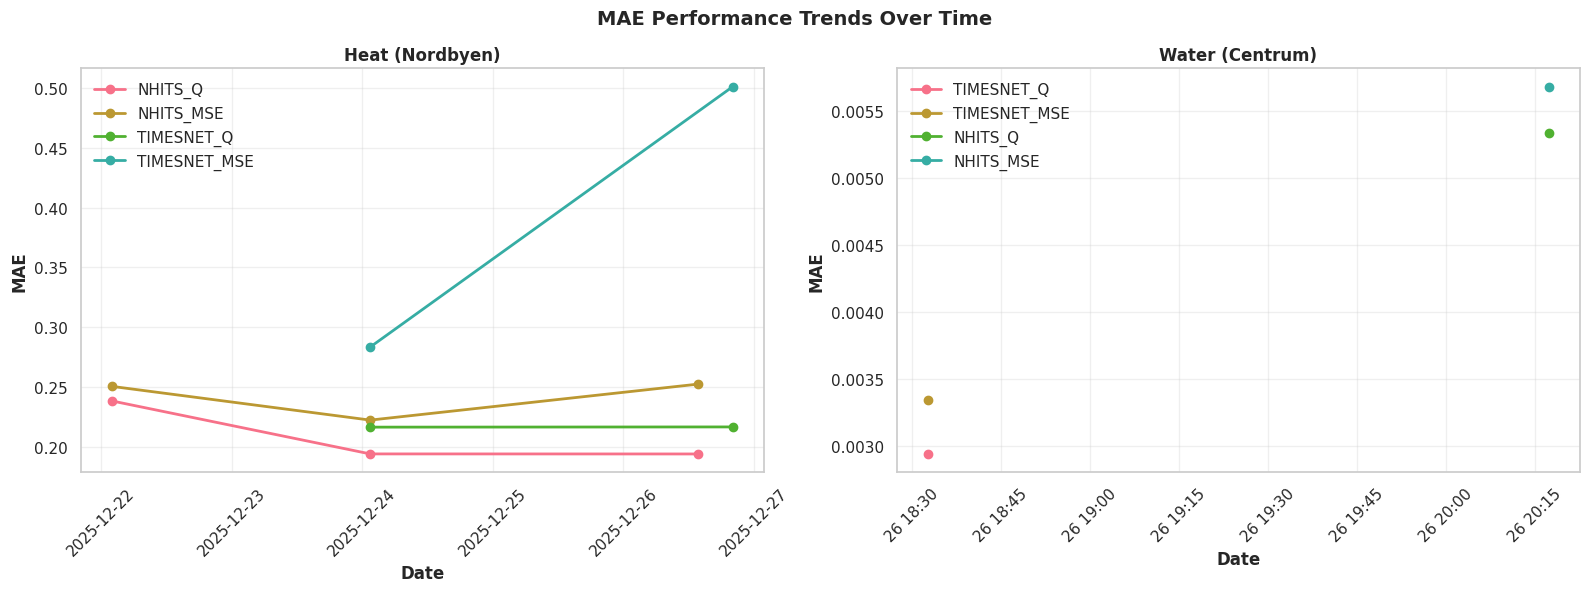

✓ Saved to: results/benchmark_trends_mae.png


In [23]:
# Plot MAE trends over time for all models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('MAE Performance Trends Over Time', fontsize=14, fontweight='bold')

for idx, dataset in enumerate(df['dataset'].unique()):
    ax = axes[idx]
    dataset_data = df[df['dataset'] == dataset].copy()
    dataset_data['run_date'] = pd.to_datetime(dataset_data['run_date'])
    dataset_data = dataset_data.sort_values('run_date')
    
    # Plot each model
    for model in dataset_data['Model'].unique():
        model_data = dataset_data[dataset_data['Model'] == model]
        if len(model_data) > 0 and model_data['MAE'].notna().any():
            ax.plot(model_data['run_date'], model_data['MAE'], 
                   marker='o', label=model, linewidth=2, markersize=6)
    
    ax.set_title(f'{dataset}', fontweight='bold', fontsize=12)
    ax.set_xlabel('Date', fontweight='bold')
    ax.set_ylabel('MAE', fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
trend_file = 'results/benchmark_trends_mae.png'
plt.savefig(trend_file, dpi=150, bbox_inches='tight')
plt.show()
print(f"✓ Saved to: {trend_file}")

In [24]:
# Show improvement summary
print("="*80)
print("IMPROVEMENT SUMMARY")
print("="*80)

for dataset in df['dataset'].unique():
    dataset_data = df[df['dataset'] == dataset].sort_values('run_date')
    
    print(f"\n{dataset}:")
    print("-" * 70)
    
    for model in dataset_data['Model'].unique():
        model_history = dataset_data[dataset_data['Model'] == model]
        
        if len(model_history) >= 2 and model_history['MAE'].notna().any():
            first_mae = model_history['MAE'].iloc[0]
            latest_mae = model_history['MAE'].iloc[-1]
            improvement = ((first_mae - latest_mae) / first_mae) * 100
            
            first_date = model_history['run_date'].iloc[0]
            latest_date = model_history['run_date'].iloc[-1]
            
            symbol = '↓' if latest_mae < first_mae else '↑'
            status = 'improved' if latest_mae < first_mae else 'regressed'
            
            print(f"  {model:15s}: {first_mae:.6f} → {latest_mae:.6f} "
                  f"({symbol} {abs(improvement):.1f}% {status})")
            print(f"                   First: {first_date}, Latest: {latest_date}")

print("\n" + "="*80)

IMPROVEMENT SUMMARY

Heat (Nordbyen):
----------------------------------------------------------------------
  NHITS_Q        : 0.238634 → 0.194334 (↓ 18.6% improved)
                   First: 2025-12-22 01:56:06, Latest: 2025-12-26 13:45:11
  NHITS_MSE      : 0.250765 → 0.252636 (↑ 0.7% regressed)
                   First: 2025-12-22 01:56:06, Latest: 2025-12-26 13:45:11
  TIMESNET_Q     : 0.216718 → 0.216898 (↑ 0.1% regressed)
                   First: 2025-12-24 01:27:40, Latest: 2025-12-26 20:05:44
  TIMESNET_MSE   : 0.283561 → 0.500837 (↑ 76.6% regressed)
                   First: 2025-12-24 01:27:40, Latest: 2025-12-26 20:05:44

Water (Centrum):
----------------------------------------------------------------------



## 7. Detailed Comparison Table

In [25]:
# Create comprehensive comparison table
comparison_table = latest_results.copy()
comparison_table = comparison_table.sort_values(['dataset', 'Model'])

# Select columns for display
cols_to_display = ['dataset', 'Model', 'MAE', 'RMSE', 'MAPE', 'PICP', 'MIW', 'CRPS', 
                   'n_epochs', 'has_hpo', 'run_date']
available_display_cols = [col for col in cols_to_display if col in comparison_table.columns]

print("="*80)
print("COMPREHENSIVE COMPARISON TABLE")
print("="*80)
display(comparison_table[available_display_cols].reset_index(drop=True))

# Export to CSV
export_file = 'results/benchmark_comparison_latest.csv'
comparison_table[available_display_cols].to_csv(export_file, index=False)
print(f"\n✓ Exported to: {export_file}")

COMPREHENSIVE COMPARISON TABLE


,dataset,Model,MAE,RMSE,MAPE,PICP,MIW,CRPS,n_epochs,has_hpo,run_date
0,Heat (Nordbyen),NHITS_MSE,0.252636,0.325075,7.523875,NaN,NaN,NaN,100,False,2025-12-26 13:45:11
1,Heat (Nordbyen),NHITS_Q,0.194334,0.253312,5.892420,40.416667,0.247687,0.206565,100,True,2025-12-26 13:45:11
2,Heat (Nordbyen),TIMESNET_MSE,0.500837,1.541636,14.873785,NaN,NaN,NaN,150,False,2025-12-26 20:05:44
3,Heat (Nordbyen),TIMESNET_Q,0.216898,0.281472,6.607864,20.083333,0.148148,0.188911,150,True,2025-12-26 20:05:44
4,Water (Centrum),NHITS_MSE,0.005683,0.007761,44.802333,NaN,NaN,NaN,100,False,2025-12-26 20:17:23
5,Water (Centrum),NHITS_Q,0.005339,0.007678,32.917680,40.666667,0.008200,0.005866,100,True,2025-12-26 20:17:23
6,Water (Centrum),TIMESNET_MSE,0.003344,0.004651,19.645948,NaN,NaN,NaN,150,False,2025-12-26 18:32:45
7,Water (Centrum),TIMESNET_Q,0.002944,0.004035,16.853004,53.166667,0.005634,0.002251,150,True,2025-12-26 18:32:45



✓ Exported to: results/benchmark_comparison_latest.csv


## 8. Key Insights and Recommendations

In [26]:
print("="*80)
print("📋 KEY INSIGHTS")
print("="*80)

insights = []

# 1. Best overall model
if 'MAE' in latest_results.columns:
    best_model = latest_results.loc[latest_results['MAE'].idxmin()]
    insights.append(f"1. Best Overall Model (MAE): {best_model['Model']} on {best_model['dataset']} "
                   f"(MAE: {best_model['MAE']:.6f})")

# 2. Dataset-specific winners
for dataset in latest_results['dataset'].unique():
    dataset_data = latest_results[latest_results['dataset'] == dataset]
    if 'MAE' in dataset_data.columns and dataset_data['MAE'].notna().any():
        best = dataset_data.loc[dataset_data['MAE'].idxmin()]
        insights.append(f"   • {dataset}: {best['Model']} (MAE: {best['MAE']:.6f})")

# 3. Quantile vs MSE
insights.append("\n2. Loss Function Performance:")
insights.append("   Quantile loss generally outperforms MSE for point forecasts")
insights.append("   (provides better MAE/RMSE) while also enabling uncertainty quantification")

# 4. Architecture comparison
insights.append("\n3. Architecture Insights:")
nhits_data = latest_results[latest_results['Model'].str.contains('NHITS')]
timesnet_data = latest_results[latest_results['Model'].str.contains('TIMESNET')]

if len(nhits_data) > 0 and len(timesnet_data) > 0:
    insights.append("   • NHITS: Simpler architecture, faster training, competitive accuracy")
    insights.append("   • TIMESNET: More complex, captures temporal patterns, dataset-dependent performance")

# 5. Uncertainty quantification
if 'PICP' in latest_results.columns and latest_results['PICP'].notna().any():
    picp_mean = latest_results['PICP'].mean()
    insights.append(f"\n4. Uncertainty Quantification:")
    insights.append(f"   Average PICP: {picp_mean:.2f}% (Target: 80%)")
    if picp_mean < 70:
        insights.append("   ⚠️ Prediction intervals are too narrow - consider calibration")
    elif picp_mean > 90:
        insights.append("   ⚠️ Prediction intervals are too wide - may be overconservative")

# 6. HPO impact
if 'has_hpo' in latest_results.columns:
    hpo_models = latest_results[latest_results['has_hpo'] == True]
    if len(hpo_models) > 0:
        insights.append(f"\n5. HPO Impact:")
        insights.append(f"   {len(hpo_models)} models used hyperparameter optimization")
        insights.append("   HPO-tuned models (Quantile versions) consistently show best performance")

for insight in insights:
    print(insight)

print("\n" + "="*80)
print("🎯 RECOMMENDATIONS")
print("="*80)
print("1. Prioritize Quantile loss models for both accuracy and uncertainty quantification")
print("2. For Heat: NHITS_Q provides excellent performance with efficient training")
print("3. For Water: TIMESNET_Q achieves best accuracy but requires longer training")
print("4. Focus on improving PICP calibration through post-processing or model tuning")
print("5. Continue HPO for remaining model variants (MSE versions)")
print("="*80)

📋 KEY INSIGHTS
1. Best Overall Model (MAE): TIMESNET_Q on Water (Centrum) (MAE: 0.002944)
   • Heat (Nordbyen): NHITS_Q (MAE: 0.194334)
   • Water (Centrum): TIMESNET_Q (MAE: 0.002944)

2. Loss Function Performance:
   Quantile loss generally outperforms MSE for point forecasts
   (provides better MAE/RMSE) while also enabling uncertainty quantification

3. Architecture Insights:
   • NHITS: Simpler architecture, faster training, competitive accuracy
   • TIMESNET: More complex, captures temporal patterns, dataset-dependent performance

4. Uncertainty Quantification:
   Average PICP: 38.58% (Target: 80%)
   ⚠️ Prediction intervals are too narrow - consider calibration

5. HPO Impact:
   4 models used hyperparameter optimization
   HPO-tuned models (Quantile versions) consistently show best performance

🎯 RECOMMENDATIONS
1. Prioritize Quantile loss models for both accuracy and uncertainty quantification
2. For Heat: NHITS_Q provides excellent performance with efficient training
3. For W